# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

Esse projeto tem como objetivo prever a renda de um cliente baseado em suas características pessoais. A renda é uma variável importante para diversas aplicações, como concessão de crédito, análise de risco, entre outras. A previsão de renda pode ser utilizada para segmentar clientes, personalizar ofertas e otimizar a experiência do cliente.


## Etapa 2 Crisp-DM: Entendimento dos dados

Nesta etapa, vamos entender os dados que temos disponíveis para a previsão de renda. Vamos analisar as variáveis disponíveis, o tipo de dado de cada variável, a distribuição dos dados e a relação entre as variáveis.


### Dicionário de dados



| Variável                |                                         Descrição                                         |       Tipo |
| ----------------------- |:-----------------------------------------------------------------------------------------:|-----------:|
| data_ref                |               Data de referência para os dados coletados (formato YYYYMM).	               |   int64    |
| id_cliente              |                             Identificador único do cliente.	                              |  object    |
| sexo                    |                   Sexo do cliente (0 para feminino, 1 para masculino).	                   |   int64    |
| posse_de_veiculo        |                   Indica se o cliente possui um veículo (sim/não).	                       |  object    |
| posse_de_imovel         |          Indica se o cliente possui um imóvel (True para sim, False para não).	           |    bool    |
| qtd_filhos              |                        Quantidade de filhos que o cliente possui.                         |    bool    |
| tipo_renda              |           Tipo de renda do cliente (por exemplo, assalariado, autônomo, etc.).	           |   int64    |
| educacao                | Nível de educação do cliente (por exemplo, ensino médio, graduação, pós-graduação, etc.). |  object    |
| estado_civil            |        Estado civil do cliente (por exemplo, solteiro, casado, divorciado, etc.).	        |  object    |
| tipo_residencia         |        Tipo de residência do cliente (por exemplo, casa própria, alugado, etc.).	         |  object    |
| idade                   |                                    Idade do cliente.	                                     |  object    |
| tempo_emprego           |                        Tempo de emprego atual do cliente em anos.	                        |   int64    |
| qt_pessoas_residencia   |               Quantidade de pessoas que residem na mesma casa do cliente.	                | float64    |
| renda                   |                                 Renda mensal do cliente.	                                 | float64    |





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling.controller.pandas_decorator import profile_report



#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [51]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [52]:
renda.head(1)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.60274,1.0,8060.34


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [53]:
prof = profile_report(renda, explorative=True, minimal=True)
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [54]:
prof.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [55]:
renda.dtypes

Unnamed: 0                 int64
data_ref                  object
id_cliente                 int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
renda                    float64
dtype: object

No Relatório do profiler, tivemos os seguintes alertas:

1. **tempo_emprego** has 2573 (17.2%) missing values
    - Precisa ser tratado!
2. **Unnamed: 0** has unique values
    - Provavelmente é um índice.
3. **qtd_filhos** has 10376 (69.2%) zeros
    - É um valor esperado, a taxa de natalidade vem caindo.
4. A **Distribuição** das variaveis numéricas parecem respeitar a distribuição normal.
5. **dados_ref** é uma data, mas está como object.
6. **sexo, tipo_renda, educacao, estado_civil e tipo_residencia** são categóricas. Criar dummies.
7. **educacao** é uma variável ordinal.

### Entendimento dos dados - Bivariadas




Exploração Visual das Relações:

    1. Gráficos de Dispersão: Para duas variáveis numéricas.
    2. Gráficos de Barras: Para uma variável categórica e uma numérica (ex.: média da variável numérica para cada categoria).
    3. Heatmaps de Correlação: Para visualizar a matriz de correlação entre variáveis numéricas.
    4. Cálculo de Correlações:

Coeficiente de Correlação de Pearson: Para medir a força e a direção da relação linear entre duas variáveis numéricas.
Correlação de Spearman: Para variáveis numéricas que não seguem uma distribuição normal.
Cálculo de Associação: Para variáveis categóricas (ex.: teste qui-quadrado).


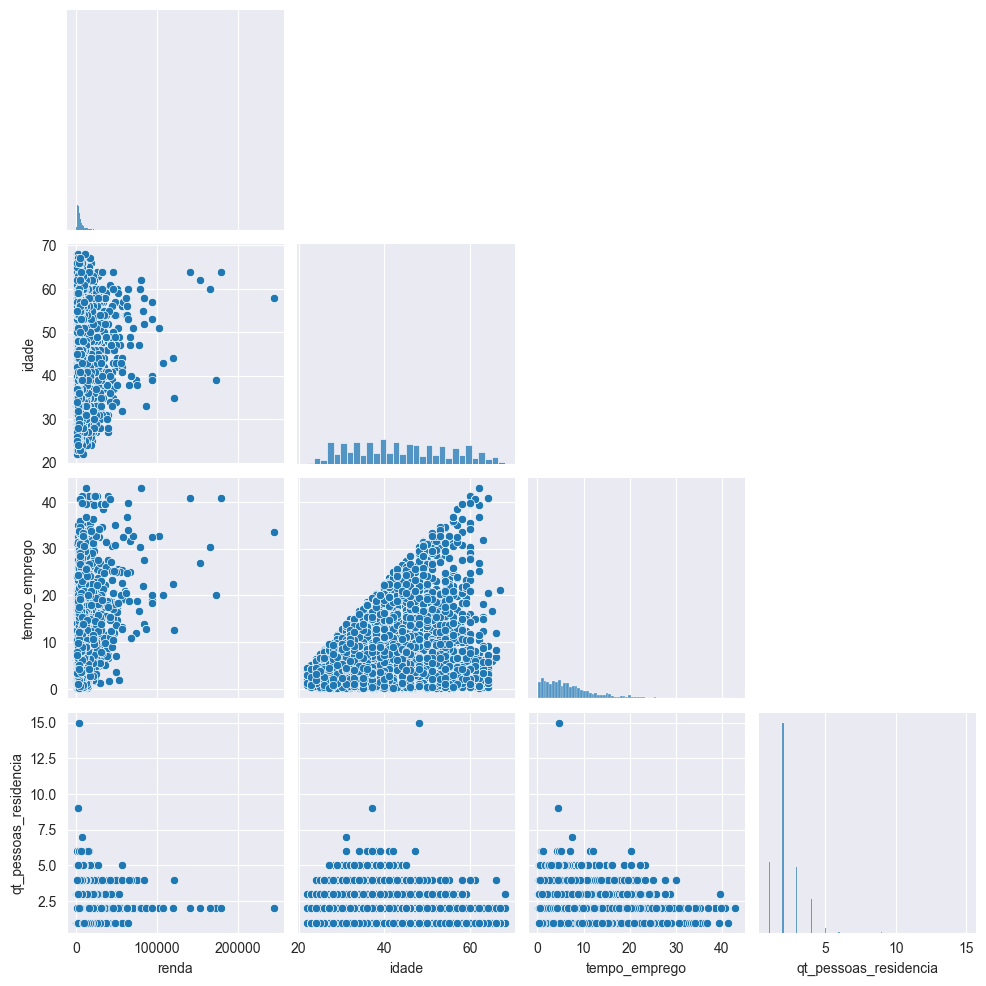

In [56]:
%matplotlib inline
# Gráficos de Dispersão das variáveis numéricas [renda, idade, tempo_emprego, qt_pessoas_residencia]
sns.pairplot(renda[['renda', 'idade', 'tempo_emprego', 'qt_pessoas_residencia']], corner=True)
plt.savefig('./output/pairplot.png')
plt.show()

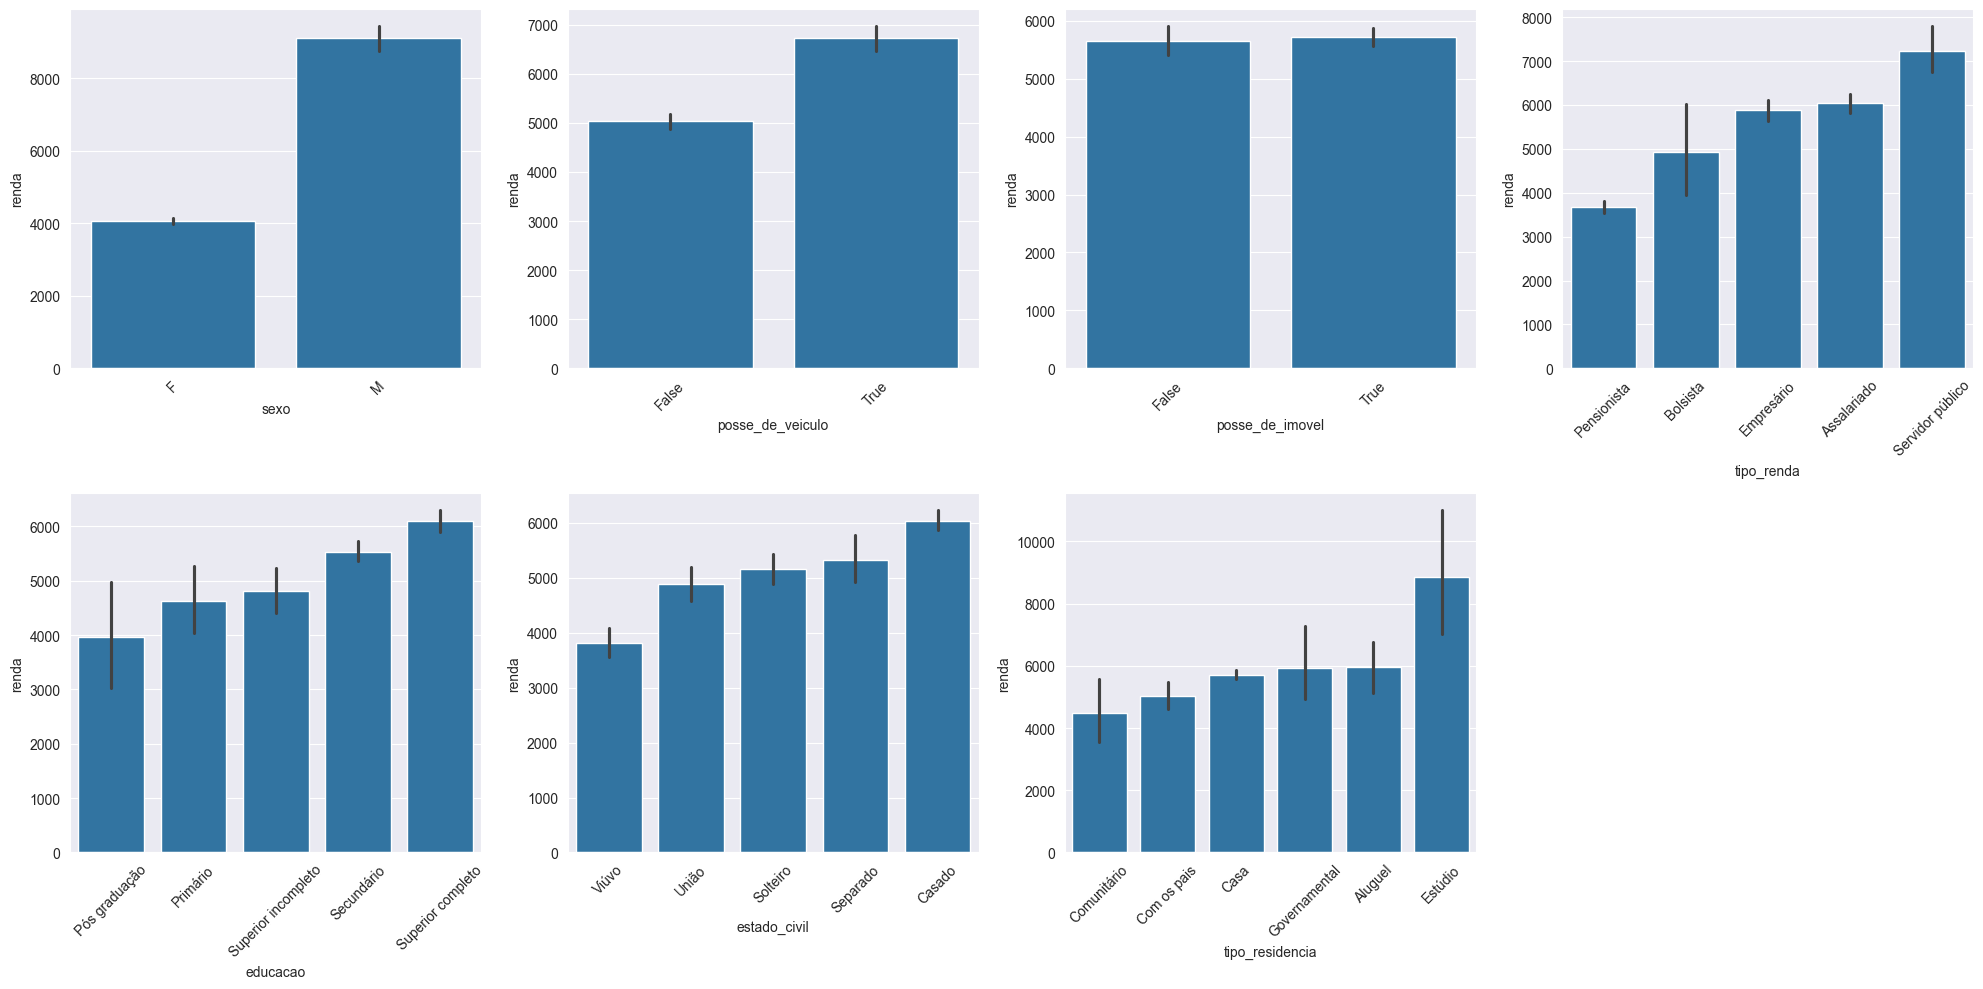

In [57]:
# Gráficos de Barras das variáveis categóricas em relação a renda
# plotando as 6 figuras juntas
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
# Ordenar por renda média
sexo_order = renda.groupby('sexo')['renda'].mean().sort_values().index
posse_de_veiculo_order = renda.groupby('posse_de_veiculo')['renda'].mean().sort_values().index
posse_de_imovel_order = renda.groupby('posse_de_imovel')['renda'].mean().sort_values().index
educacao_order = renda.groupby('educacao')['renda'].mean().sort_values().index
estado_civil_order = renda.groupby('estado_civil')['renda'].mean().sort_values().index
tipo_residencia_order = renda.groupby('tipo_residencia')['renda'].mean().sort_values().index
tipo_renda_order = renda.groupby('tipo_renda')['renda'].mean().sort_values().index

# Criar os barplots ordenados
sns.barplot(x='sexo', y='renda', data=renda, order=sexo_order, ax=axs[0, 0])
sns.barplot(x='posse_de_veiculo', y='renda', data=renda, order=posse_de_veiculo_order, ax=axs[0, 1])
sns.barplot(x='posse_de_imovel', y='renda', data=renda, order=posse_de_imovel_order, ax=axs[0, 2])
sns.barplot(x='tipo_renda', y='renda', data=renda, order=tipo_renda_order, ax=axs[0, 3])
sns.barplot(x='educacao', y='renda', data=renda, order=educacao_order, ax=axs[1, 0])
sns.barplot(x='estado_civil', y='renda', data=renda, order=estado_civil_order, ax=axs[1, 1])
sns.barplot(x='tipo_residencia', y='renda', data=renda, order=tipo_residencia_order, ax=axs[1, 2])


# Remover o gráfico extra vazio
fig.delaxes(axs[1, 3])

# Rotacionar os rótulos do eixo x para todos os gráficos
for ax in axs.flat:
    if ax:
        ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('./output/barplots.png')
plt.show()

In [58]:
renda.isna().sum().sort_values(ascending=False) # Verificar valores faltantes.

tempo_emprego            2573
Unnamed: 0                  0
data_ref                    0
id_cliente                  0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
qt_pessoas_residencia       0
renda                       0
dtype: int64

In [59]:
renda = (renda.drop(columns=['Unnamed: 0', 'data_ref', 'id_cliente'])
              .dropna()) # Remover linhas com valores faltantes, pois são poucas.
renda.isna().sum().sort_values(ascending=False) # Verificar se ainda existem valores faltantes.

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

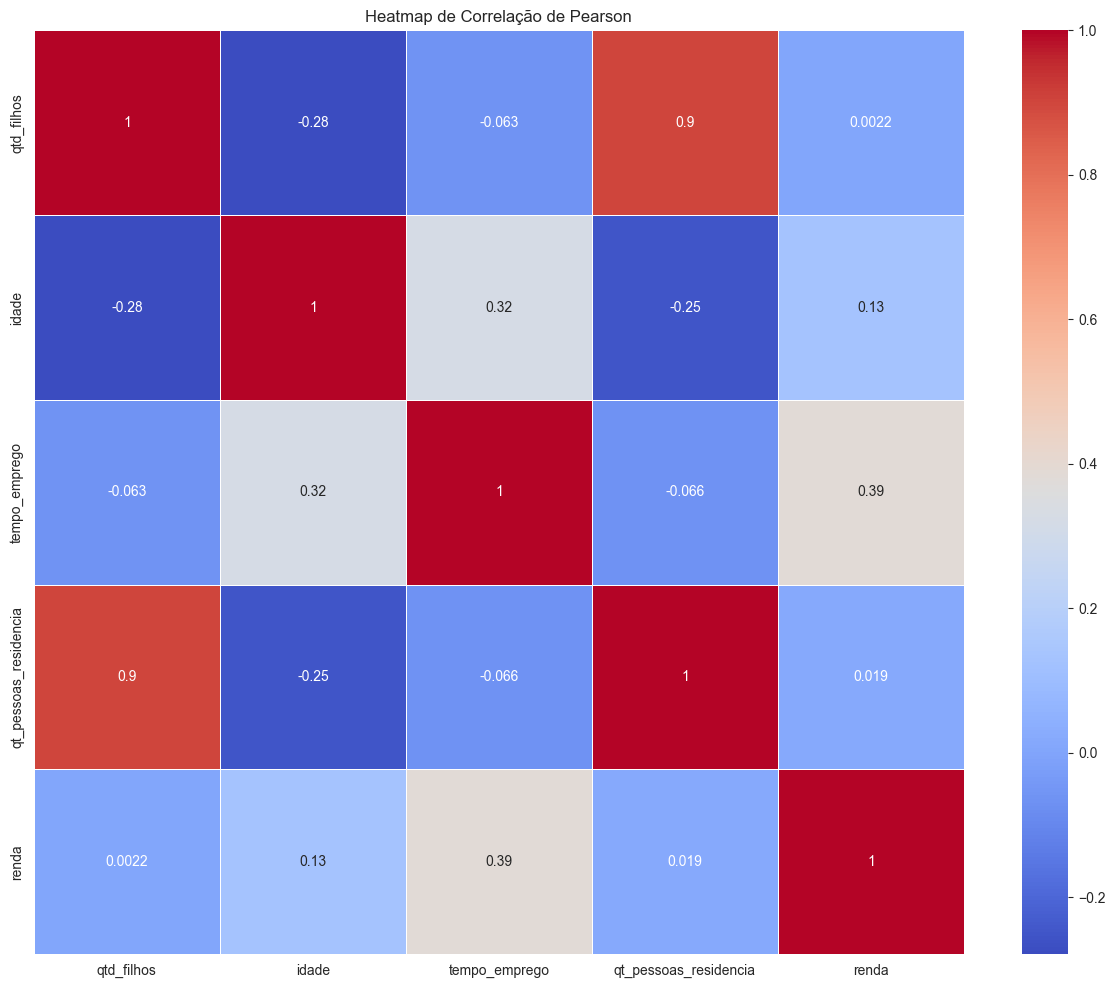

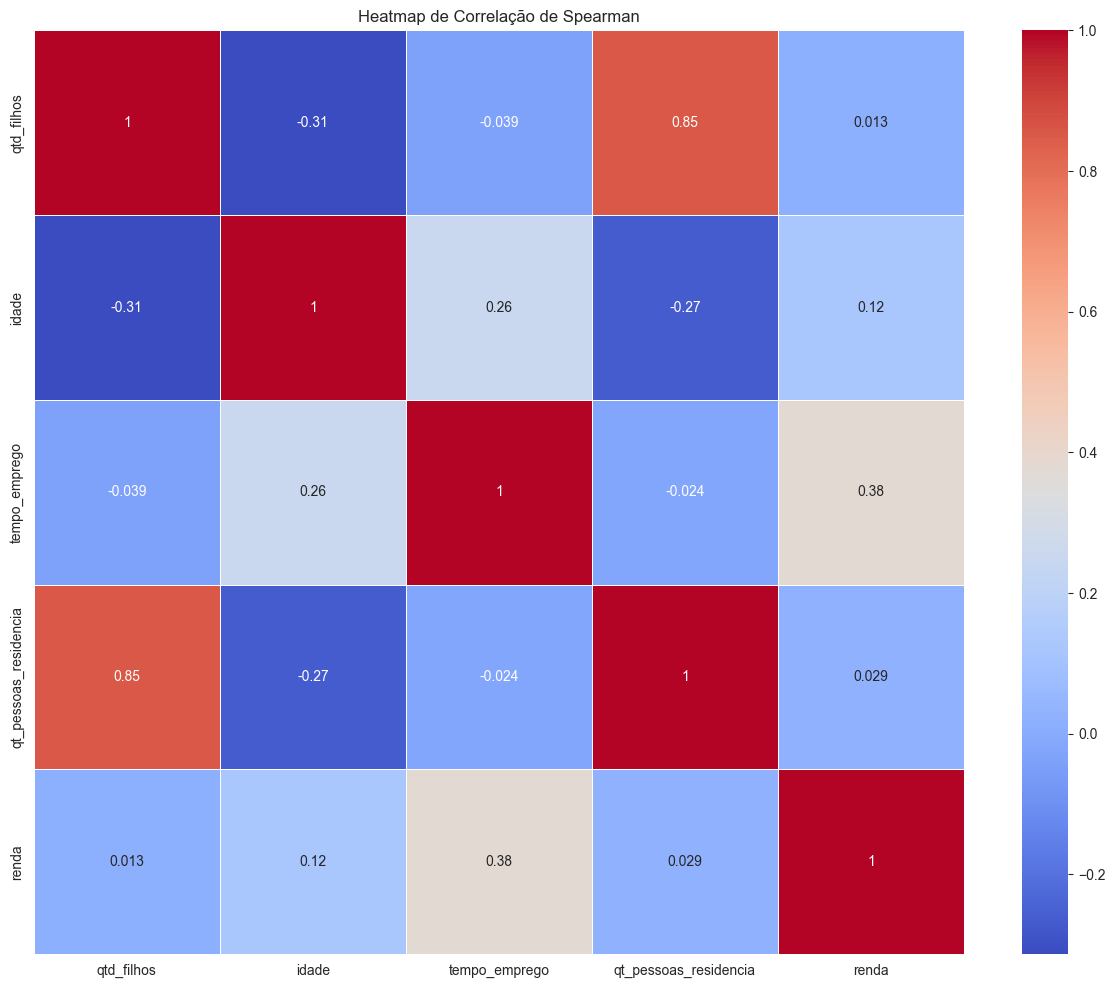

In [85]:
# Selecionar apenas colunas numéricas
numeric_columns = renda.select_dtypes(include=['number']).columns

# Heatmap de correlação de Pearson
# Heatmap de correlação de Spearman
plt.figure(figsize=(15, 12))  # Increase the size of the plot
spearman_corr = renda[numeric_columns].corr(method='pearson')
sns.heatmap(spearman_corr,annot=True, cmap='coolwarm', linewidths=0.5)


plt.title('Heatmap de Correlação de Pearson')
plt.savefig('./output/heatmap_pearson.png')  
plt.show()

# Heatmap de correlação de Spearman
plt.figure(figsize=(15, 12))  # Increase the size of the plot
spearman_corr = renda[numeric_columns].corr(method='spearman')
sns.heatmap(spearman_corr,annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Heatmap de Correlação de Spearman')
plt.savefig('./output/heatmap_spearman.png') 
plt.show()

)1. dispersão: não parece haver uma relação linear forte entre as variáveis numéricas e a renda.
2. barras: existe uma diferença na renda média entre as categorias das variáveis categóricas menos para a variável **posse_de_imovel**.
3. heatmaps: não parece haver uma correlação forte entre as variáveis numéricas e a renda. Mas a correlação de renda com tempo_emprego pode ser interessante.


## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



 - seleção: Já temos os dados selecionados adequadamente?
    - **Não**. Precisamos remover a coluna **Unnamed: 0**.
 - limpeza: Precisaremos tratar dados faltantes em **tempo_emprego**. 


- Construção de novas variáveis não é necessária.
- integração: Temos apenas uma fonte de dados, não é necessário integração.
- formatação: criaremos dummies para as variáveis categóricas.

In [61]:
# Criar dummies para as variáveis categóricas
renda = pd.get_dummies(renda, columns=['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True)

# Converter colunas uint8 para bool
for col in renda.select_dtypes(['uint8']).columns:
    renda[col] = renda[col].astype(bool)

# salvar o arquivo
renda.to_csv('./output/renda_preparada.csv', index=False)
renda.dtypes


posse_de_veiculo                    bool
posse_de_imovel                     bool
qtd_filhos                         int64
idade                              int64
tempo_emprego                    float64
qt_pessoas_residencia            float64
renda                            float64
sexo_M                              bool
tipo_renda_Bolsista                 bool
tipo_renda_Empresário               bool
tipo_renda_Pensionista              bool
tipo_renda_Servidor público         bool
educacao_Pós graduação              bool
educacao_Secundário                 bool
educacao_Superior completo          bool
educacao_Superior incompleto        bool
estado_civil_Separado               bool
estado_civil_Solteiro               bool
estado_civil_União                  bool
estado_civil_Viúvo                  bool
tipo_residencia_Casa                bool
tipo_residencia_Com os pais         bool
tipo_residencia_Comunitário         bool
tipo_residencia_Estúdio             bool
tipo_residencia_

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


Como em tarefas passadas já realizei regressão e árvore nesse dataset quero tentar algo novo,
utilizarei o TPOT para encontrar o melhor modelo para prever a renda. O tpot usa o sklearn com scripts prontos para testar vários modelos para tentar encontrar o melhor.

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Supondo que 'renda' seja a variável alvo e as demais sejam features
X = renda.drop('renda', axis=1)
y = renda['renda']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Rodando o modelo


In [63]:
from timeit import default_timer as timer
# Teste de Resíduos
from scipy.stats import shapiro, levene
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn.metrics import r2_score

# Criar um DataFrame para salvar os resultados
results_df = pd.DataFrame(columns=['model', 'execution_time', 'r2', 'shapiro', 'levene', 'het_breuschpagan'])

#### TPOT

In [64]:
import joblib
from tpot import TPOTRegressor, TPOTClassifier


# Inicializar o TPOTClassifier
tpot = TPOTRegressor(generations=3, population_size=10, verbosity=2, random_state=42)

# Treinar o TPOTClassifier
start = timer()
tpot.fit(X_train, y_train)
end = timer()

# gerar previsões para calcular o R2 Score e salvar com o tempo de execução
y_pred = tpot.predict(X_test)
r2 = r2_score(y_test, y_pred)
residuals = y_test - y_pred
_, p_value_het, _, _ = het_breuschpagan(residuals, X_test)
_, p_value_lev = levene(residuals, y_test)
_, p_value_shap = shapiro(residuals)

results_df.loc[len(results_df)] = ['TPOT', end - start, r2, p_value_shap, p_value_lev, p_value_het] 

# Exportar o pipeline otimizado
tpot.export('./output/tpot_pipeline.py')

Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -45131205.84977277

Generation 2 - Current best internal CV score: -45131205.84977277

Generation 3 - Current best internal CV score: -42436171.79763452

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=True, max_features=0.7500000000000001, min_samples_leaf=3, min_samples_split=9, n_estimators=100)


Vou tentar brevemente fazer uma regressão linear e uma árvore de decisão com busca de hiperparametros para comparar os resultados.

### Regressão Linear

In [65]:
from sklearn.linear_model import LinearRegression

# Inicializar o modelo
lr = LinearRegression()

# Treinar o modelo

# usar timeit para medir o tempo de execução

start = timer()
lr.fit(X_train, y_train)
end = timer()


# R2 Score com sklearn
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
residuals = y_test - y_pred
_, p_value_het, _, _ = het_breuschpagan(residuals, X_test)
_, p_value_lev = levene(residuals, y_test)
_, p_value_shap = shapiro(residuals)

# Salvar os resultados no DataFrame
results_df.loc[len(results_df)] = ['Linear Regression', end - start, r2, p_value_shap, p_value_lev, p_value_het]

joblib.dump(lr, './output/linear_regression_model.pkl')

print(f'R2 Score: {r2:.2f}')

R2 Score: 0.30


### Árvore de Decisão

In [66]:
from tqdm import tqdm
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# inicializar busca de hiperparametros
rf = RandomForestRegressor()

# Definindo as distribuições dos hiperparâmetros
param_dist = {
    'n_estimators': np.arange(100, 1000, 100),  # Lista de valores discretos
    'max_depth': np.arange(5, 50, 5),  # Lista de valores discretos
    'min_samples_split': np.arange(2, 20, 2),  # Lista de valores discretos
    'min_samples_leaf': np.arange(1, 20, 2),  # Lista de valores discretos
    'max_features': ['sqrt', 'log2', None],  # Lista de valores discretos
}

# Inicializar o RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Configurar o RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    scoring='r2',  # Métrica para avaliar as combinações
    cv=5,  # Número de folds na validação cruzada
    verbose=2,
    random_state=42,
    n_jobs=-1  # Usar todos os processadores disponíveis
)


start = timer()
# Adicionar tqdm para monitorar o progresso
for i in tqdm(range(10), desc="RandomizedSearchCV progress"):
    random_search.n_iter = i + 1
    random_search.fit(X_train, y_train)
end = timer()

joblib.dump(random_search, './output/random_search_model.pkl')

# Melhor combinação de hiperparâmetros
print("Melhores hiperparâmetros encontrados:")
print(random_search.best_params_)

# Melhor modelo treinado
best_rf = random_search.best_estimator_

# Avaliar o melhor modelo nos dados de teste
y_pred = best_rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
residuals = y_test - y_pred
_, p_value_het, _, _ = het_breuschpagan(residuals, X_test)
_, p_value_lev = levene(residuals, y_test)
_, p_value_shap = shapiro(residuals)

# Salvar os resultados no DataFrame
results_df.loc[len(results_df)] = ['Random Forest', end - start, r2, p_value_shap, p_value_lev, p_value_het]


print(f"R^2 Score: {r2}")





RandomizedSearchCV progress:   0%|          | 0/10 [00:00<?, ?it/s]

Fitting 5 folds for each of 1 candidates, totalling 5 fits


RandomizedSearchCV progress:  10%|█         | 1/10 [00:03<00:28,  3.12s/it]

Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV progress:  20%|██        | 2/10 [00:06<00:26,  3.31s/it]

Fitting 5 folds for each of 3 candidates, totalling 15 fits


RandomizedSearchCV progress:  30%|███       | 3/10 [00:10<00:24,  3.56s/it]

Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV progress:  40%|████      | 4/10 [00:19<00:33,  5.64s/it]

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV progress:  50%|█████     | 5/10 [00:30<00:38,  7.80s/it]

Fitting 5 folds for each of 6 candidates, totalling 30 fits


RandomizedSearchCV progress:  60%|██████    | 6/10 [00:42<00:36,  9.14s/it]

Fitting 5 folds for each of 7 candidates, totalling 35 fits


RandomizedSearchCV progress:  70%|███████   | 7/10 [00:54<00:30, 10.06s/it]

Fitting 5 folds for each of 8 candidates, totalling 40 fits


RandomizedSearchCV progress:  80%|████████  | 8/10 [01:08<00:22, 11.32s/it]

Fitting 5 folds for each of 9 candidates, totalling 45 fits


RandomizedSearchCV progress:  90%|█████████ | 9/10 [01:35<00:16, 16.11s/it]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV progress: 100%|██████████| 10/10 [02:03<00:00, 12.30s/it]


Melhores hiperparâmetros encontrados:
{'n_estimators': 800, 'min_samples_split': 12, 'min_samples_leaf': 9, 'max_features': None, 'max_depth': 10}
R^2 Score: 0.4492513543565906


## Etapa 5 Crisp-DM: Avaliação dos resultados


- Teste de Resíduos:
    - Normalidade: Teste de Shapiro-Wilk
    - Homocedasticidade: Teste de Levene
    - R2 Score: Coeficiente de Determinação
    - AIC: Critério de Informação de Akaike 
    - BIC: Critério de Informação Bayesiano
    - F-Test: Teste de Significância do Modelo
    - T-Test: Teste de Significância dos Coeficientes

In [67]:


# Salvar o DataFrame em um arquivo CSV na pasta output
results_df.to_csv('./output/test_results.csv', index=False)

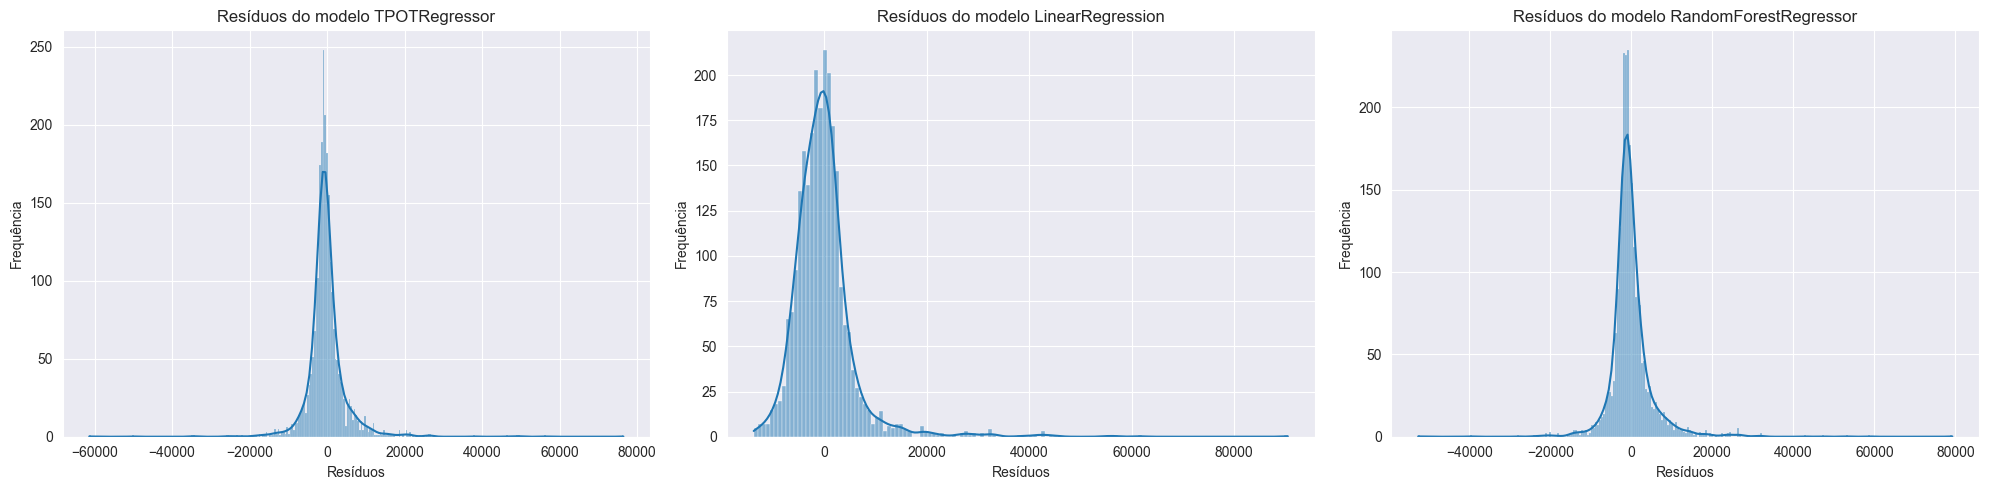

In [68]:
# plotando residuos dos modelos
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Garantir que não há valores inf ou NaN
X_test = np.nan_to_num(X_test, nan=np.nan, posinf=np.nan, neginf=np.nan)
y_test = np.nan_to_num(y_test, nan=np.nan, posinf=np.nan, neginf=np.nan)


for i, model in enumerate([tpot, lr, best_rf]):
    residuals = y_test - model.predict(X_test)
    sns.histplot(residuals, ax=axs[i], kde=True)
    axs[i].set_title(f"Resíduos do modelo {type(model).__name__}")
    axs[i].set_xlabel("Resíduos")
    axs[i].set_ylabel("Frequência")
    
plt.tight_layout()
plt.savefig('./output/residuos.png')
plt.show()


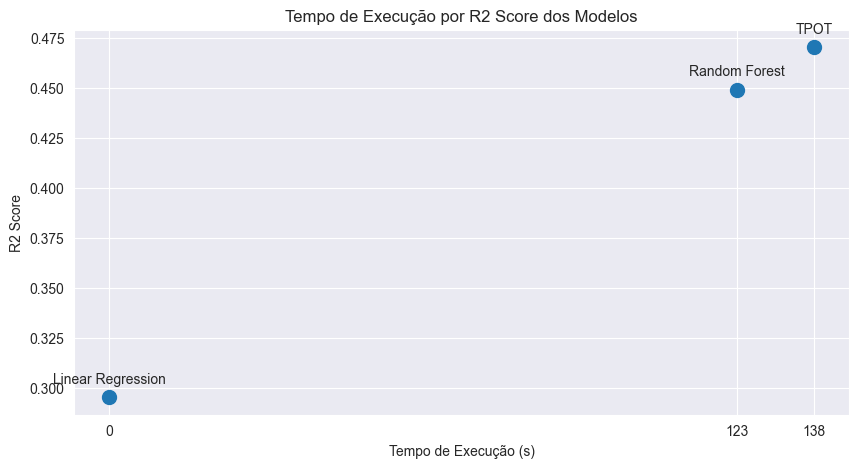

In [69]:
# plotar tempo de execução por R2 Score dos modelos

fig, ax = plt.subplots(figsize=(10, 5))

# Extrair os valores de R2 Score e tempo de execução do DataFrame

r2_scores = results_df['r2'] 
tempos = results_df['execution_time']
modelos = results_df['model']


# Plotar o gráfico de tempo de execução por R2 Score

ax.scatter(tempos, r2_scores, s=100)
ax.set_xlabel('Tempo de Execução (s)')
ax.set_ylabel('R2 Score')
ax.set_title('Tempo de Execução por R2 Score dos Modelos')
ax.set_xticks(tempos)

# adicionar o nome dos modelos
for i, modelo in enumerate(modelos):
    ax.annotate(modelo, (tempos[i], r2_scores[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.savefig('./output/tempo_r2.png')
plt.show()




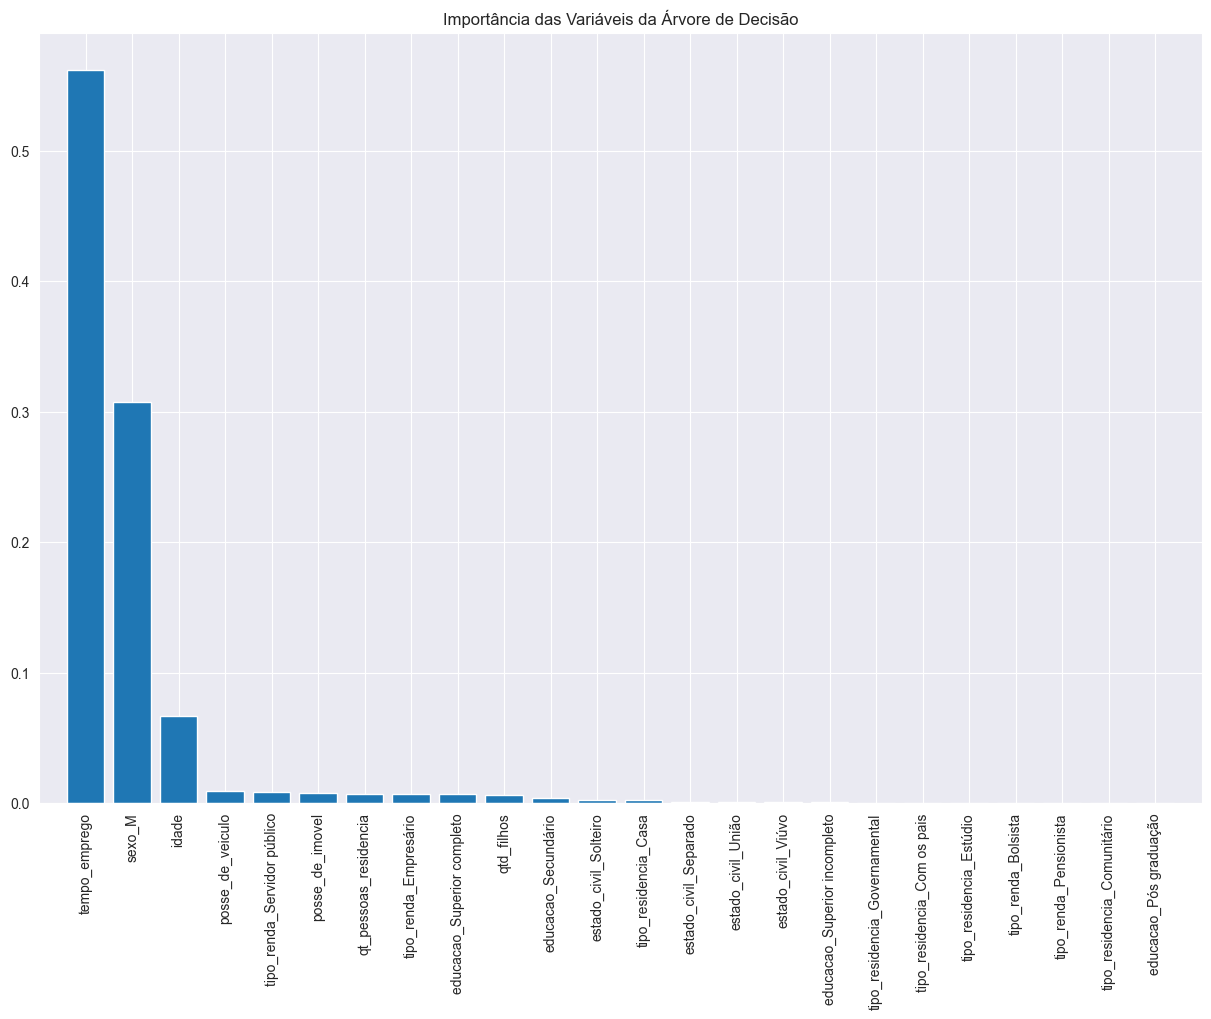

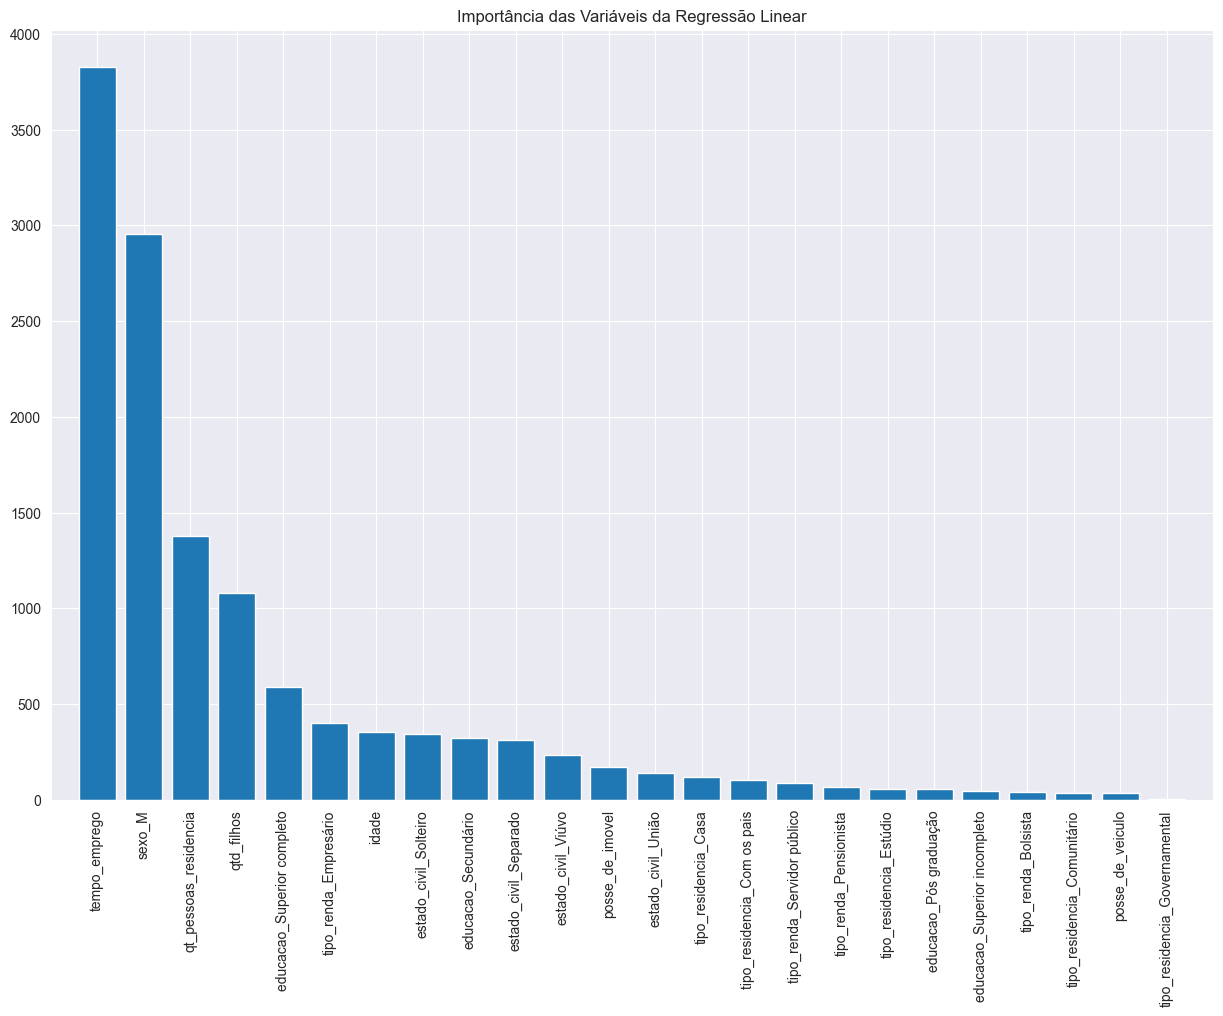

In [76]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.pipeline import Pipeline
# variáveis importantes do modelo de árvore de decisão

# Extrair as variáveis importantes do modelo de árvore de decisão
importances = best_rf.feature_importances_  
indices = np.argsort(importances)[::-1] 

# Plotar as variáveis importantes   
plt.figure(figsize=(15, 10))
plt.title("Importância das Variáveis da Árvore de Decisão")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.savefig('./output/importancia_variaveis_rf_RandomSearch.png')
plt.show()

# variáveis importantes do modelo de linear regression

# Extrair as variáveis importantes do modelo de linear regression
importances = np.abs(lr.coef_)
indices = np.argsort(importances)[::-1]

# Plotar as variáveis importantes
plt.figure(figsize=(15, 10))    
plt.title("Importância das Variáveis da Regressão Linear")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)    
plt.xlim([-1, X_train.shape[1]])
plt.savefig('./output/importancia_variaveis_lr.png')    
plt.show()


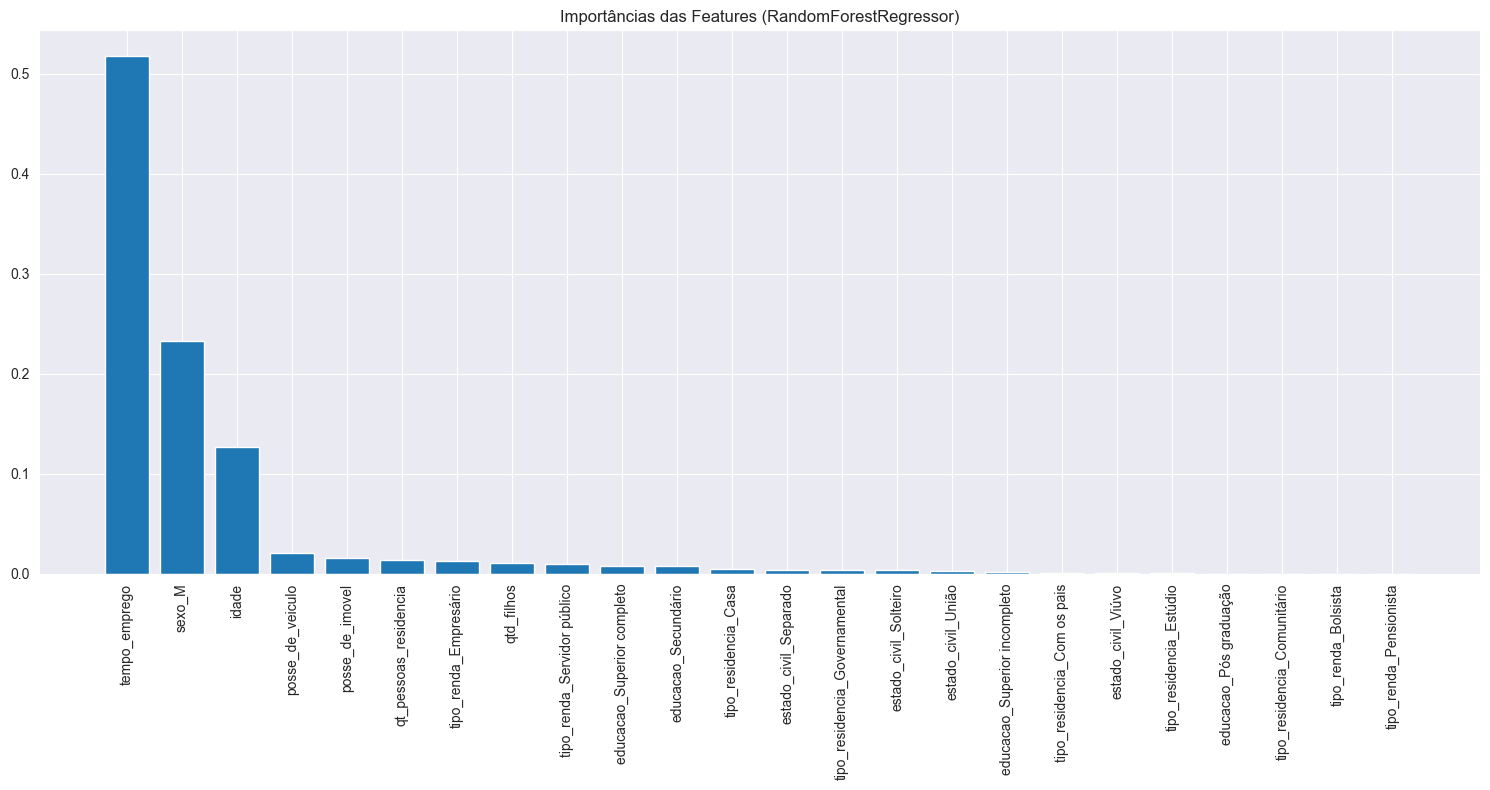

In [77]:
# variáveis importantes do modelo TPOT      

# Obtenha o pipeline final ajustado pelo TPOT
pipeline = tpot.fitted_pipeline_

# Acessar o RandomForestRegressor
random_forest = pipeline.named_steps['randomforestregressor']

# Verifique se o modelo é um RandomForestRegressor
if isinstance(random_forest, RandomForestRegressor):
    # Extraia os nomes de todas as colunas usadas no modelo
    all_feature_names = X.columns # Isso inclui todas as colunas, numéricas e dummies

    # Extrair as importâncias das features do RandomForestRegressor
    rf_importances = random_forest.feature_importances_

    # Verificar a quantidade de features
    if len(rf_importances) == len(all_feature_names):
        rf_feature_names = all_feature_names
    else:
        print(f"Tamanho das importâncias do RandomForest: {len(rf_importances)}")
        print(f"Tamanho dos nomes de todas as features: {len(all_feature_names)}")
        rf_feature_names = all_feature_names[:len(rf_importances)]  # Ajustar o tamanho

    rf_indices = np.argsort(rf_importances)[::-1]

    # Plotar as importâncias das features do RandomForestRegressor
    plt.figure(figsize=(15, 8))
    plt.title("Importâncias das Features (RandomForestRegressor)")
    plt.bar(range(len(rf_importances)), rf_importances[rf_indices], align='center')
    plt.xticks(range(len(rf_importances)), [rf_feature_names[i] for i in rf_indices], rotation=90)
    plt.tight_layout()
    plt.savefig('./output/importancia_variaveis_rf_tpot.png')
    plt.show()
else:
    print("O modelo dentro do pipeline não corresponde ao esperado.")

In [83]:
# salvar o tpot
# Extraia o pipeline treinado
trained_pipeline = tpot.fitted_pipeline_

# Salve o pipeline treinado
joblib.dump(trained_pipeline, './output/trained_pipeline.pkl')

['./output/trained_pipeline.pkl']

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

### no nosso caso os modelos e os plots foram salvos em arquivos, podemos usar o streamlit para mostrar os plots e o melhor modelo em outro arquivo python.